In [224]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import curve_fit
from scipy.constants import pi as pi
from scipy.constants import e as e
from scipy.constants import k as k

$\text{\huge{Лабораторная работа 3.5.1 Изучение плазмы газового разряда в неоне}}$

Севастьян Черняков и Георгий Чирков, Б05-207

Цель работы: изучение вольт-амперной характеристики тлеющего разряда, изучение свойств плазмы методом зондовых характеристик.

$\text{\huge{{Ход работы}}}$

$\text{\huge{{ВАХ разряда}}}$

полученные данные:


$U_{заж} = (211 \pm 1)В$ - напряжение зажигания разряда

таблицы $I_p(U_p)$:

прямое измерение (повышение U)

|          |       |      |      |      |      |      |      |      |      |      |      |       |       |       |       |       |
|----------|-------|------|------|------|------|------|------|------|------|------|------|-------|-------|-------|-------|-------|
| **U, В** | 23.23 | 22.8 | 22.4 | 22   | 21.7 | 21.2 | 20.9 | 20.4 | 20.2 | 19.9 | 19.8 | 19.75 | 19.67 | 19.61 | 19.37 | 19.18 |
| **I, мА** | 2.27  | 2.4  | 2.53 | 2.65 | 2.74 | 2.88 | 2.99 | 3.15 | 3.28 | 3.44 | 3.55 | 3.78  | 3.87  | 3.99  | 4.15  | 4.3   |








обратное измерение (понижение U)
|           |       |       |       |       |       |       |       |       |       |       |       |       |       |      |
|-----------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|------|
| **U, В**  | 19.38 | 19.54 | 19.64 | 19.71 | 19.79 | 19.78 | 19.92 | 20.17 | 20.51 | 21.12 | 21.71 | 21.96 | 22.44 | 22.8 |
| **I, мА**  | 4.16  | 4.05  | 3.93  | 3.77  | 3.62  | 3.53  | 3.38  | 3.24  | 3.11  | 2.92  | 2.75  | 2.68  | 2.52  | 2.4  |
|           |       |       |       |       |       |       |       |       |       |       |       |       |       |      |
| 23.19 | 23.36 | 23.8  | 24    | 24.7  | 25.3  | 26.5  | 28.1  | 30.04 | 32.6  | 33.8  | 34.3  | 34.96 | 35.6  | 36   |
| 2.24  | 2.19  | 2.08  | 2.02  | 1.87  | 1.75  | 1.52  | 1.32  | 1.15  | 1.01  | 0.88  | 0.75  | 0.57  | 0.38  | 0.31 |





$\text{\huge{{Зондовые характеристики}}}$

полученные данные:

ВАХ двойного зонда $I_з(U_з)$ при разных фиксированных токах разряда $I_p$

|         |        |        |        |
|---------|--------|--------|--------|
| $I_p$, мА | 5      | 3      | 1.5    |
| $U_з$, В||    $I_з$, мкА    
| 25      | 102    | 74.42  | 39.27  |
| 22      | 106    | 73.16  | 37.92  |
| 19      | 104.4  | 71.08  | 36.62  |
| 16      | 99.7   | 68.06  | 35.18  |
| 13      | 90.4   | 63.07  | 33.18  |
| 10      | 77     | 54.94  | 29.53  |
| 8       | 65.2   | 47.57  | 26.28  |
| 6       | 51.5   | 38.18  | 21.91  |
| 4       | 34.5   | 27.08  | 16.01  |
| 2       | 16     | 14.81  | 9.32   |
| 0       | 0      | 0      | 0      |
| -2      | -8.88  | -6.29  | -4.94  |
| -4      | -22.2  | -18.4  | -11.55 |
| -6      | -39.75 | -29.8  | -17.1  |
| -8      | -54.63 | -39.23 | -21.5  |
| -10     | -66.44 | -46.63 | -24.67 |
| -13     | -79.83 | -55.88 | -27.95 |
| -16     | -89    | -59.58 | -29.75 |
| -19     | -93.12 | -62.38 | -30.97 |
| -22     | -95.55 | -64.26 | -32.1  |
| -25     | -90.28 | -65.42 | -33.2  |


$\text{\huge{Обработка результатов}}$

In [225]:
i = np.array([4.16  , 4.05  , 3.93  , 3.77  , 3.62  , 3.53  , 3.38  , 3.24  , 3.11  , 2.92  , 2.75  , 2.68  , 2.52  , 2.4 ,  2.24  , 2.19  , 2.08  , 2.02  , 1.87  , 1.75  , 1.52  , 1.32  , 1.15  , 1.01  , 0.88  , 0.75  , 0.57  , 0.38  , 0.31]) #мА

u = np.array([19.38 , 19.54 , 19.64 , 19.71 , 19.79 , 19.78 , 19.92 , 20.17 , 20.51 , 21.12 , 21.71 , 21.96 , 22.44 , 22.8 , 23.19 , 23.36 , 23.8  , 24    , 24.7  , 25.3  , 26.5  , 28.1  , 30.04 , 32.6  , 33.8  , 34.3  , 34.96 , 35.6  , 36])

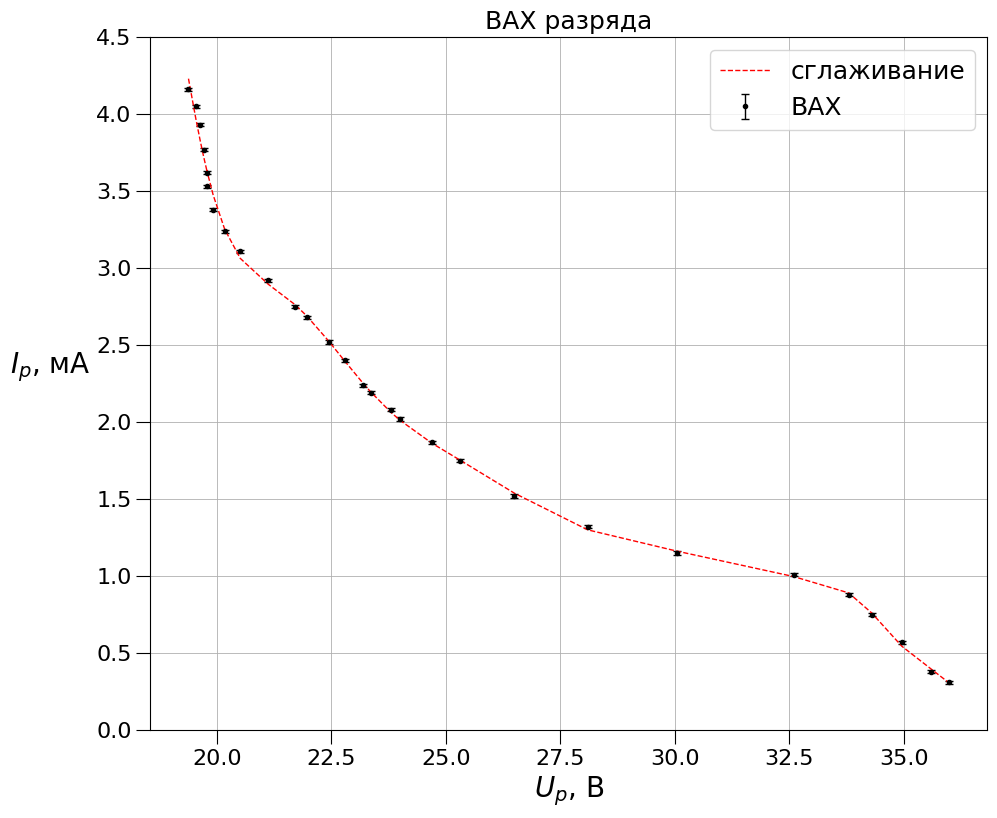

In [226]:
plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)

plt.title('ВАХ разряда', fontsize=18)
#plt.xlim(xmin=0, xmax=0.03)
#plt.ylim(ymin=0, ymax=100)
plt.ylabel('$I_p$, мА', fontsize=20, rotation=0, ha='right')
plt.xlabel('$U_p$, В', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)



yerr_1 = 0.01

plt.errorbar(
    u,
    i,
    fmt='ko',
    linewidth=1,
    markersize=3,
    elinewidth=1,
    label='ВАХ',
    # xerr=xerr_1,
    yerr=yerr_1,
    capsize=3
)


dx_dy = np.diff(u) / np.diff(i)
max_slope = np.max(dx_dy)
max_slope_index = np.argmax(dx_dy)

m = max_slope  # Угловой коэффициент

z = np.polyfit(u, i, deg=12)
polynom_1 = np.poly1d(z)
plt.plot(u, polynom_1(u),"r--", linewidth=1, label="сглаживание")


plt.legend(fontsize=18, markerscale = 1)
plt.ylim(0, 4.5)
# plt.xlim(18, 37)
plt.show()

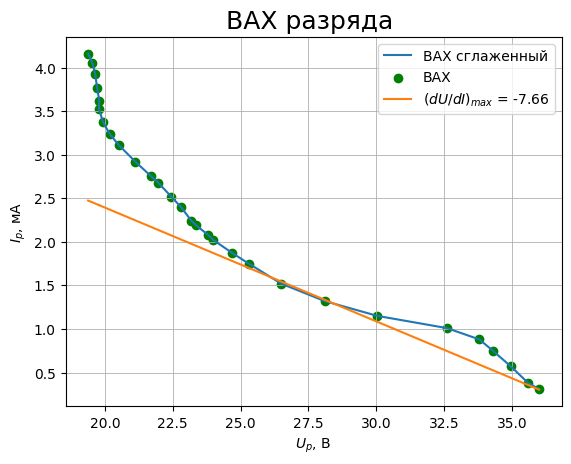

In [227]:
i = np.array([4.16, 4.05, 3.93, 3.77, 3.62, 3.53, 3.38, 3.24, 3.11, 2.92, 2.75, 2.68, 2.52, 2.4, 2.24, 2.19, 2.08, 2.02, 1.87, 1.75, 1.52, 1.32, 1.15, 1.01, 0.88, 0.75, 0.57, 0.38, 0.31])
u = np.array([19.38, 19.54, 19.64, 19.71, 19.79, 19.78, 19.92, 20.17, 20.51, 21.12, 21.71, 21.96, 22.44, 22.8, 23.19, 23.36, 23.8, 24, 24.7, 25.3, 26.5, 28.1, 30.04, 32.6, 33.8, 34.3, 34.96, 35.6, 36])

du_di = np.gradient(u, i)

max_du_di_index = np.argmax(du_di)
plt.title('ВАХ разряда ', fontsize=18)

plt.plot(u, i, label='ВАХ сглаженный')
plt.scatter(u, i, label='ВАХ', color = 'green')
plt.grid(visible=True, linewidth=0.6)




tangent_slope = du_di[max_du_di_index]
tangent_intercept = i[max_du_di_index] - tangent_slope * u[max_du_di_index]

tangent_line = tangent_slope * u + tangent_intercept - 1.2

plt.plot(u, tangent_line, label='$(dU/dI)_{max}$' + f' = {1 / tangent_slope:.2f}')

plt.xlabel('$U_p$, В')
plt.ylabel('$I_p$, мА')
plt.legend()

plt.show()

полученные из графика данные:

$R_{дифф} = |\frac{dU}{dI}|_{max} = $ 7600 Ом (без учета делителя напряжения)

полученный график соответствует участку ДГ из приложения



$\text{\huge{Зондовые характеристики}}$

Уравнение прямой: y = 1.716666666666669 x + 70.0833333333333
Координаты пересечения с осью ординат: 0 70.0833333333333
Уравнение касательной: y = 7.357678571428574 x + 4.4528571428571455


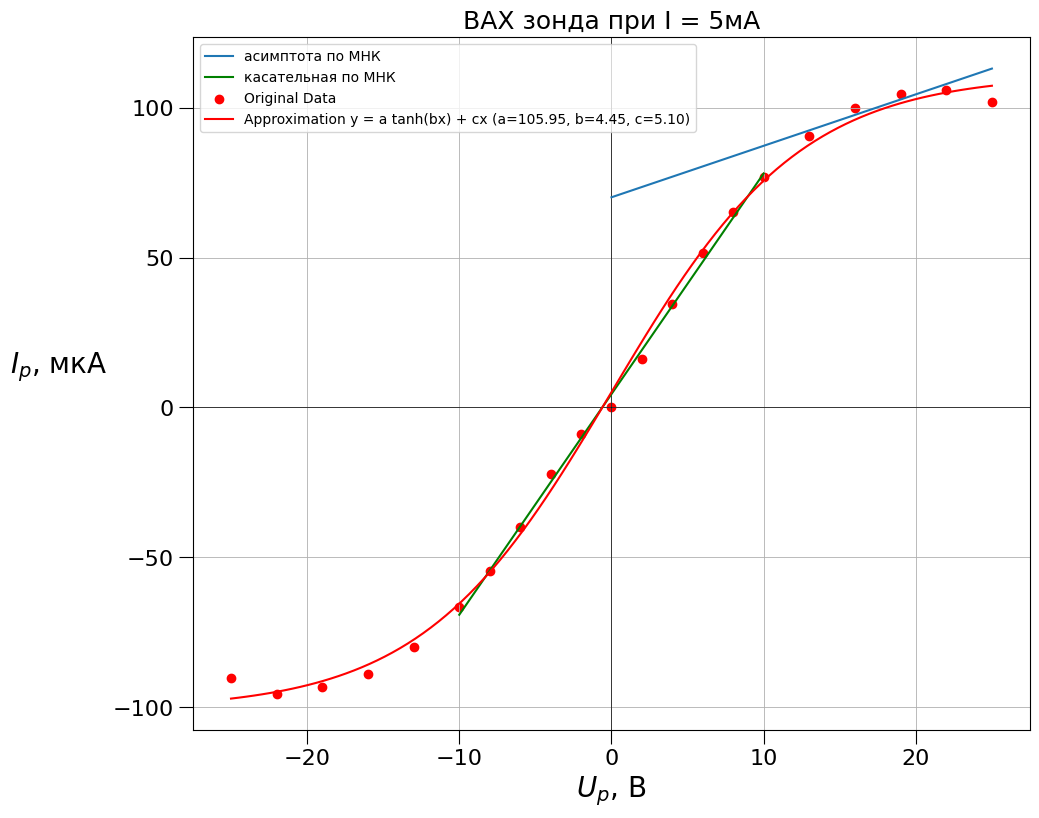

In [228]:
i = np.array([102, 106,104.4,99.7,90.4,77,65.2,51.5,34.5,16,0,-8.88,-22.2,-39.75,-54.63,-66.44,-79.83,-89,-93.12,-95.55,-90.28]) #мА

u = np.array([25, 22, 19, 16, 13, 10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10, -13, -16, -19, -22, -25])


d = np.array([])

def func(x, a, b, c):
    return a * np.tanh(b * x) + c

params, _ = curve_fit(func, u, i)
a, b, c = params


plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('ВАХ зонда при I = 5мА', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

x_range = np.linspace(min(u), max(u), 100)
y_approx = func(x_range, a, b, c)



x = np.array([22, 19, 16, 13])
y = np.array([106,104.4,99.7,90.4])

m, b = np.polyfit(x, y, 1)
x_intersection = 0
y_intersection = b
print("Уравнение прямой: y =", m, "x +", b)
print("Координаты пересечения с осью ординат:", x_intersection, y_intersection)
x_line = np.array([0, 25])
y_line = m * x_line + b
plt.plot(x_line, y_line, label = 'асимптота по МНК')


x = np.array([6, 4, 2, 0, -2, -4, -6])
y = np.array([51.5,34.5,16,0,-8.88,-22.2,-39.75])

m, b = np.polyfit(x, y, 1)
x_intersection = 0
y_intersection = b
d =np.append(d, m)
print("Уравнение касательной: y =", m, "x +", b)
x_line = np.array([-10, 10])
y_line = m * x_line + b
plt.plot(x_line, y_line, color = 'green', label = 'касательная по МНК')




plt.scatter(u, i, color='red', label='Original Data')
plt.plot(x_range, y_approx, 'r', label=f'Approximation y = a tanh(bx) + cx (a={a:.2f}, b={b:.2f}, c={c:.2f})')
plt.ylabel('$I_p$, мкА', fontsize=20, rotation=0, ha='right')
plt.xlabel('$U_p$, В', fontsize=20)
plt.legend()
plt.show()

Уравнение прямой: y = 0.7053333333333334 x + 57.22066666666667
Координаты пересечения с осью ординат: 0 57.22066666666667
Уравнение касательной: y = 5.602999999999999 x + 3.439999999999999


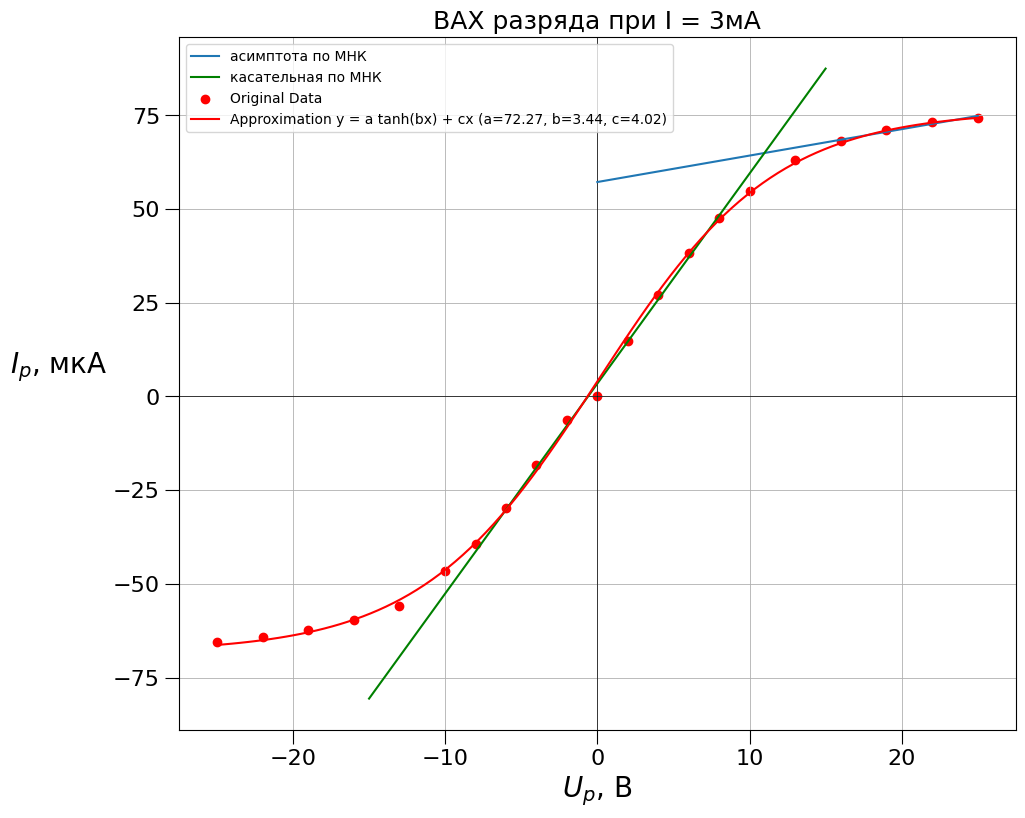

In [229]:
i = np.array([74.42,73.16,71.08,68.06,63.07,54.94,47.57,38.18,27.08,14.81,0,-6.29,-18.4,-29.8,-39.23,-46.63,-55.88,-59.58,-62.38,-64.26,-65.42])

u = np.array([25, 22, 19, 16, 13, 10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10, -13, -16, -19, -22, -25])


def func(x, a, b, c):
    return a * np.tanh(b * x) + c

params, _ = curve_fit(func, u, i)
a, b, c = params


plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('ВАХ разряда при I = 3мА', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

x_range = np.linspace(min(u), max(u), 100)
y_approx = func(x_range, a, b, c)


x = np.array([25, 22, 19, 16])
y = np.array([74.42,73.16,71.08,68.06])

m, b = np.polyfit(x, y, 1)
x_intersection = 0
y_intersection = b
print("Уравнение прямой: y =", m, "x +", b)
print("Координаты пересечения с осью ординат:", x_intersection, y_intersection)
x_line = np.array([0, 25])
y_line = m * x_line + b
plt.plot(x_line, y_line, label = 'асимптота по МНК')


x = np.array([4, 2, 0, -2, -4])
y = np.array([27.08,14.81,0,-6.29,-18.4])

m, b = np.polyfit(x, y, 1)
d =np.append(d, m)
x_intersection = 0
y_intersection = b
print("Уравнение касательной: y =", m, "x +", b)
x_line = np.array([-15, 15])
y_line = m * x_line + b
plt.plot(x_line, y_line, color = "green", label = 'касательная по МНК')

plt.scatter(u, i, color = 'red', label='Original Data')
plt.plot(x_range, y_approx, 'r', label=f'Approximation y = a tanh(bx) + cx (a={a:.2f}, b={b:.2f}, c={c:.2f})')
plt.ylabel('$I_p$, мкА', fontsize=20, rotation=0, ha='right')
plt.xlabel('$U_p$, В', fontsize=20)
plt.legend()
plt.show()

Уравнение прямой: y = 0.4973333333333347 x + 26.98466666666664
Координаты пересечения с осью ординат: 0 26.98466666666664
Уравнение касательной: y = 3.4690000000000003 x + 1.7679999999999996


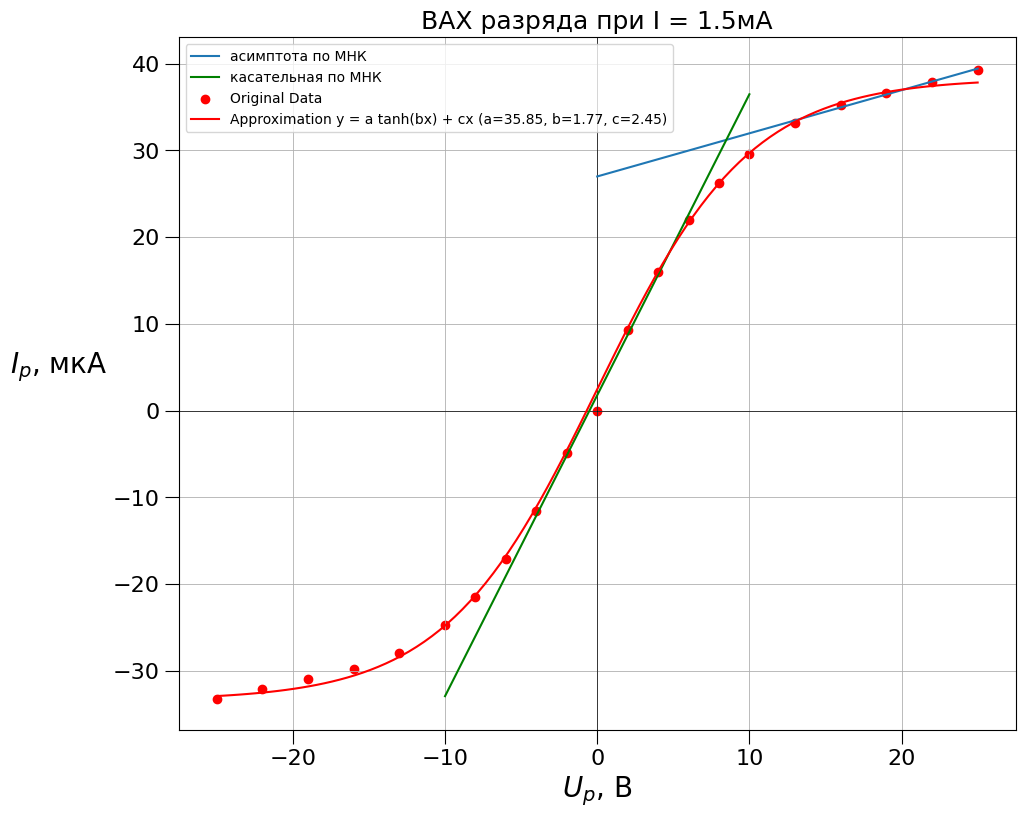

In [230]:
i = np.array([39.27,
37.92,
36.62,
35.18,
33.18,
29.53,
26.28,
21.91,
16.01,
9.32,
0,
-4.94,
-11.55,
-17.1,
-21.5,
-24.67,
-27.95,
-29.75,
-30.97,
-32.1,
-33.2])

u = np.array([25, 22, 19, 16, 13, 10, 8, 6, 4, 2, 0, -2, -4, -6, -8, -10, -13, -16, -19, -22, -25])


def func(x, a, b, c):
    return a * np.tanh(b * x) + c

params, _ = curve_fit(func, u, i)
a, b, c = params


plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('ВАХ разряда при I = 1.5мА', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

x_range = np.linspace(min(u), max(u), 100)
y_approx = func(x_range, a, b, c)



x = np.array([25, 22, 19, 16, 13])
y = np.array([39.27,37.92,36.62,35.18,33.18])

m, b = np.polyfit(x, y, 1)
x_intersection = 0
y_intersection = b
print("Уравнение прямой: y =", m, "x +", b)
print("Координаты пересечения с осью ординат:", x_intersection, y_intersection)
x_line = np.array([0, 25])
y_line = m * x_line + b
plt.plot(x_line, y_line, label = 'асимптота по МНК')






x = np.array([4, 2, 0, -2, -4])
y = np.array([16.01,
9.32,
0,
-4.94,
-11.55])

m, b = np.polyfit(x, y, 1)
x_intersection = 0
y_intersection = b

d =np.append(d, m)
print("Уравнение касательной: y =", m, "x +", b)
x_line = np.array([-10, 10])
y_line = m * x_line + b
plt.plot(x_line, y_line, color = "green", label = 'касательная по МНК')




plt.scatter(u, i, color = 'red', label='Original Data')
plt.plot(x_range, y_approx, 'r', label=f'Approximation y = a tanh(bx) + cx (a={a:.2f}, b={b:.2f}, c={c:.2f})')
plt.ylabel('$I_p$, мкА', fontsize=20, rotation=0, ha='right')
plt.xlabel('$U_p$, В', fontsize=20)
plt.legend()
plt.show()

полученные величины

|             |    |    |     |
|-------------|----|----|-----|
| **$I_p$, мА**  | 5  | 3  | 1.5 |
| **$I_{iн}$, мА** | 70 | 57 | 27  |
| **$\frac{dI}{dU}$, $Ом^{-1}*10^{-3}$** | 7.36 | 5.60 | 3.47  |

найдем теперь

$kT_e = \dfrac{1}{2}\dfrac{eI_{i\text{н}}}{\dfrac{dI}{dU}|_{U=0}}$ 

$n_e = \dfrac{I_{iн}}{0.4eS\sqrt{\dfrac{2kT_e}{m_i}}} = \dfrac{2.5I_{iн}}{\pi dle}\cdot \sqrt{\dfrac{m_i}{2kT_e}}$, где $m_i = 22*1.66*10^{-27}кг$

$\omega_p = \sqrt{\dfrac{4\pi n_e e^2}{m_e}}$

$r_D = \sqrt{\dfrac{kT_e}{4\pi n_e e^2}}$



In [231]:
d = d / 1000000
print(d)
mi = 22*1.66*1e-27
i = np.array([70, 57, 27]) / 1000000
kT = 0.5 * scipy.constants.e * i / d
T = kT / scipy.constants.k
ne = 2.5 * i * np.sqrt(mi/(2*kT)) / (np.pi * 0.2*1e-3 *5.2*1e-3 * scipy.constants.e)
wp = np.sqrt(4 * np.pi * ne * scipy.constants.e**2 / (9.11*1e-31))
rd = np.sqrt( scipy.constants.k *T / (4 * np.pi * ne)) / scipy.constants.e

print(T)
print(ne)
print(wp)
print(rd)
print(scipy.constants.e)



[7.35767857e-06 5.60300000e-06 3.46900000e-06]
[55201.94043695 59027.08664362 45160.27519196]
[5.17459085e+16 4.07478154e+16 2.20668642e+16]
[135361.18426816 120118.05796938  88394.74524589]
[6.75717987 7.87408004 9.35910445]
1.602176634e-19



|             |    |    |     |
|-------------|----|----|-----|
| **$I_p$, мА**  | 5  | 3  | 1.5 |
| **$I_{iн}$, мкА** | 70 | 57 | 27  |
| **$\frac{dI}{dU}$, $Ом^{-1}*10^{-6}$** | 7.36 | 5.60 | 3.47  |
| **$T_e$, $K*10^4$** | 55 |59 | 45  |
| **$n_e$, $10^{16}*м^{-3}$** | 5.2 | 4.1 | 2.2 |
| **$\omega_p$, $рад/с*10^5$** | 1.4 | 1.2|  0.88 |
| **$r_D$, $cм*10^{-5}$** |  |  |   |


$\text{\huge{Вывод}}$

В работе было проведено исследование ВАХ тлеющего разряда и исследование плазмы методом зондовых характеристик

по полученным результатам рассчитана температура электронов, ток насыщения, 

значения температуры, концентрации, частоты электронов совпадает с табличным

остальные значения представляют собой не пойми что